In [4]:
import matplotlib.pyplot as plt

In [5]:
from collections import namedtuple
import pandas as pd
#pd.style.set_properties(subset=['ad_description'], **{'width-min': '300px'})


fnames = []
#KW = ['D', 'X', 'R', 'S', 'M', 'N', 'L', 'i']
KW = ['D', 'X', 'R', 'S', 'M', 'N', 'i']
Key = namedtuple('Key', KW)
keys = []
datasets = ['cifarfs',  'fc100', 'miniimagenet', 'tieredimagenet']# 'miniimagenet84',]# 'tieredimagenet']
for i in [1, 2, 3]:
    for D in datasets:
        for M in ['']:
            for N in [0.0, 0.2, 0.4, ]:
                for NT in [N]:
                    for X in [0]:
                        for S in ['00.0']:
                            for R in [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
                                if D == 'tieredimagenet' and i > 2: 
                                    continue
                                #for L in ['0.000001', '0.000002', '0.000004', '0.000008']:
                                #fnames.append(f'features.{D}{M}_{R}_n{N}_x{X}_s{S}_l{L}.pt55.lam1000.0_nt{NT}.csv')
                                fnames.append(f'features.{D}{M}_{R}_n{N}_x{X}_s{S}_#{i}.pt55.lam1000.0_nt{NT}.csv')
                                #keys.append(Key(D=D, X=X, R=R, S=float(S), M=M, N=N, L=float(L), i=i))
                                keys.append(Key(D=D, X=X, R=R, S=float(S), M=M, N=N, i=i))
                        for S in ['00.1', '01.0', '10.0']:
                            for R in [0.0]:
                                if D == 'tieredimagenet' and i > 2: 
                                    continue
                                fnames.append(f'features.{D}{M}_{R}_n{N}_x{X}_s{S}_#{i}.pt55.lam1000.0_nt{NT}.csv')
                                keys.append(Key(D=D, X=X, R=R, S=float(S), M=M, N=N, i=i))

In [6]:
recs = []
shots = [5]
mets = [
'test_acc', 
# 'test_acc_me1', 
# 'test_acc_me2',
# 'test_acc_me3',
# 'test_acc_me4',
# 'test_acc_me5',
# 'test_acc_me6',
# 'test_acc_me7',
# 'test_acc_me8',
# 'test_acc_me9',
'test_acc_med',
'test_acc_maj',

]

metrics = set()
KW = ['D','R','S','M','N']
for key, fname in zip(keys, fnames):
    #print(key)
    rec = {}
    cdf = pd.read_csv(f'results/{fname}')
    #print(cdf.columns)
    #rec['test_acc_80'] = cdf[cdf.shots==80].test_acc*100
    for m in mets:
        for s in shots:
            metric = f'{m}_{s}' 
            rec[metric] = float(cdf[m][cdf.shots==s]*100)
            metrics.add(metric)  
    for k in KW +['i']:
        rec[k] = key.__getattribute__(k)
    recs.append(rec)
metrics = sorted(list(metrics))
#metrics = ['test_acc_5', 'test_acc_80', 'test_acc_lin_5', 'test_acc_lin_80']






In [7]:
df = pd.DataFrame(recs)
df = df.groupby(KW).mean().reset_index()

print(df.to_markdown())
print(df.groupby('N').mean())

|     | D              |   R |    S | M   |   N |   test_acc_5 |   test_acc_med_5 |   test_acc_maj_5 |   i |
|----:|:---------------|----:|-----:|:----|----:|-------------:|-----------------:|-----------------:|----:|
|   0 | cifarfs        | 0   |  0   |     | 0   |      82.6725 |          82.3498 |          82.6791 | 2   |
|   1 | cifarfs        | 0   |  0   |     | 0.2 |      70.528  |          70.6911 |          70.4818 | 2   |
|   2 | cifarfs        | 0   |  0   |     | 0.4 |      56.9004 |          57.1258 |          56.756  | 2   |
|   3 | cifarfs        | 0   |  0.1 |     | 0   |      82.3765 |          82.1276 |          82.4871 | 2   |
|   4 | cifarfs        | 0   |  0.1 |     | 0.2 |      70.7605 |          70.8858 |          70.7276 | 2   |
|   5 | cifarfs        | 0   |  0.1 |     | 0.4 |      56.4258 |          56.6844 |          56.3662 | 2   |
|   6 | cifarfs        | 0   |  1   |     | 0   |      82.1289 |          81.8516 |          82.228  | 2   |
|   7 | cifarfs    

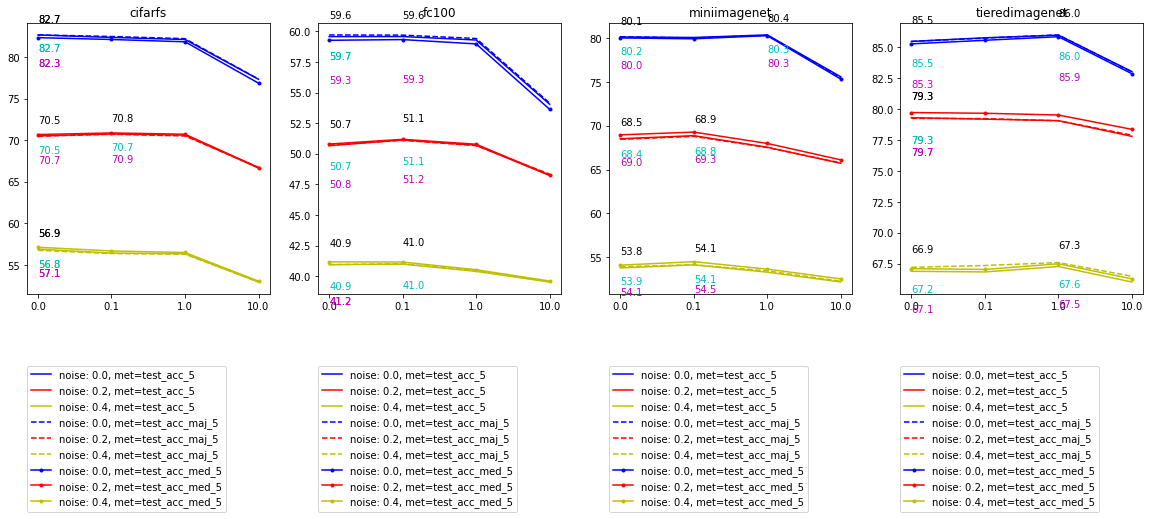

[('test_acc_5', 'k'), ('test_acc_maj_5', 'c'), ('test_acc_med_5', 'm')]


In [8]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(5*len(df.D.unique()),5))
for metric, dash, y_shift, text_color in zip(metrics, ['-', '--', '.-'], [1.5,-2,-3.5], ('k','c','m')):
    for i,D in enumerate(df.D.unique()):
        plt.subplot(1, len(df.D.unique()), i+1)
        for N, color in  zip(sorted(df.N.unique()), ['b', 'r', 'y', 'g']):
            cdf = df[df.D==D][df.R==0][df.M==''][df.N==N].sort_values('S')
            vals = cdf[metric].astype(float)
            plt.plot(range(len(cdf.S)), vals, dash, label=f'noise: {N}, met={metric}', color=color)
            plt.text(vals.argmax(), vals.max()+y_shift, f'{vals.max():.1f}',color=text_color)
            plt.text(0, vals.iloc[0]+y_shift, f'{vals.iloc[0]:.1f}',color=text_color)

            #print(f'{N=}')
            #print(df[df.R==0][df.M==''][df.N==N].to_markdown())
            #print()

        plt.legend(loc=(0,-0.8))
        plt.xticks(range(len(cdf.S)),cdf.S)
        plt.title(f'{D}')

plt.show()

print(list(zip(metrics, ('k','c','m'))))




[('test_acc_5', 'k'), ('test_acc_maj_5', 'c'), ('test_acc_med_5', 'm')]


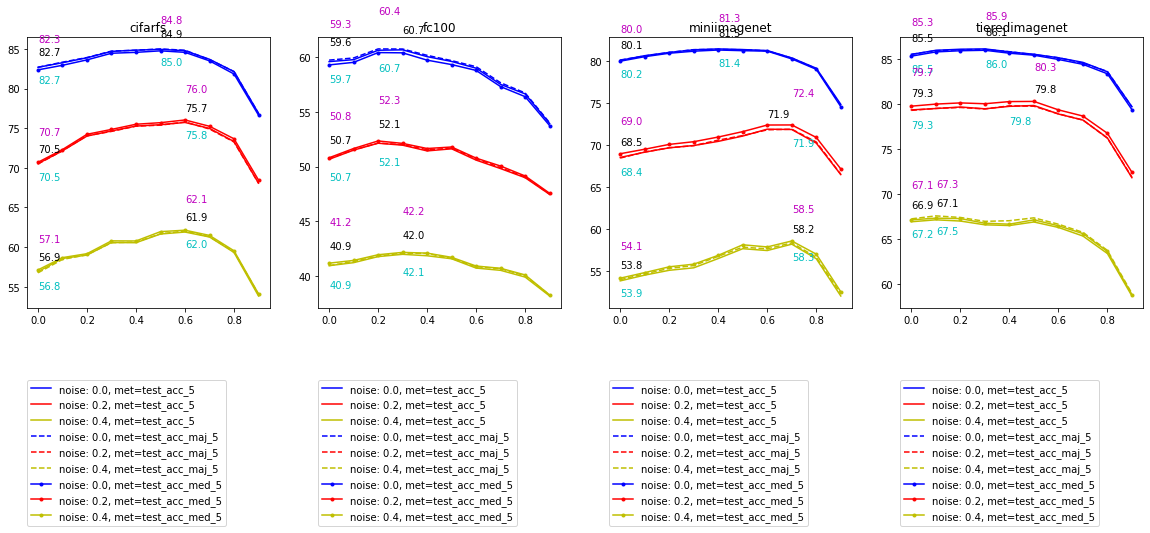

In [9]:
plt.figure(figsize=(5*len(df.D.unique()),5))
for metric, dash, y_shift, text_color in zip(metrics, ['-', '--','.-'], [1.5, -2, 3.5], ('k','c','m')):
    for i,D in enumerate(df.D.unique()):
        plt.subplot(1, len(df.D.unique()), i+1)
        for N, color in  zip(sorted(df.N.unique()), ['b', 'r', 'y', 'g']):
            cdf = df[df.D==D][df.M==''][df.S==0.0][df.N==N].sort_values('R')
            vals = cdf[metric].astype(float)
            plt.plot(cdf.R, vals, dash, label=f'noise: {N}, met={metric}', color=color)
            plt.text(cdf.R.iloc[vals.argmax()], vals.max()+y_shift, f'{vals.max():.1f}', color=text_color)
            plt.text(cdf.R.iloc[0], vals.iloc[0]+y_shift, f'{vals.iloc[0]:.1f}', color=text_color)
        plt.legend(loc=(0,-0.8))
        plt.title(f'{D}') 

print(list(zip(metrics, ('k','c','m'))))

plt.show()

KeyError: 'L'

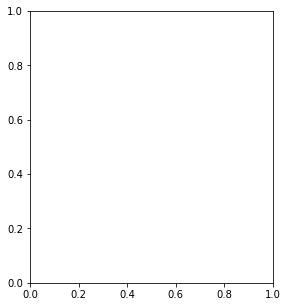

In [10]:
import warnings
warnings.filterwarnings("ignore")

for metric in metrics:
    plt.figure(figsize=(5*len(df.D.unique()),5))
    for i,D in enumerate(df.D.unique()):
        plt.subplot(1, len(df.D.unique()), i+1)
        for N in  sorted(df.N.unique()):
            cdf = df[df.D==D][df.R==0][df.M==''][df.N==N][df.S==0].sort_values('L')
            vals = cdf[metric].astype(float)
            plt.plot(range(len(cdf.L)), vals, '-x', label=N)
            x = vals.argmax()
            y = vals.max()
            plt.text(vals.argmax(), vals.max(), f'{vals.max():.1f}')
            plt.text(0, vals.iloc[0], f'{vals.iloc[0]:.1f}')

            #print(f'{N=}')
            #print(df[df.R==0][df.M==''][df.N==N].to_markdown())
            #print()

        plt.legend(title='Noise')
        plt.xticks(range(len(cdf.L)),cdf.L)
        plt.title(f'{D}: {metric}') 
    plt.show()